In [1]:
import numpy as np
import pandas as pd
import sklearn
# Raw URL of the CSV file
data_url = "./BostonHousing.csv"
# Read the CSV file
boston = pd.read_csv(data_url)
boston[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
X = boston.drop('medv', axis=1)
y = boston['medv']

import xgboost
d_param = {
    "learning_rate": 0.01
}
model = xgboost.train(params=d_param,
                      dtrain=xgboost.DMatrix(X, label=y), 
                      num_boost_round=100)

In [4]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
i = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:])

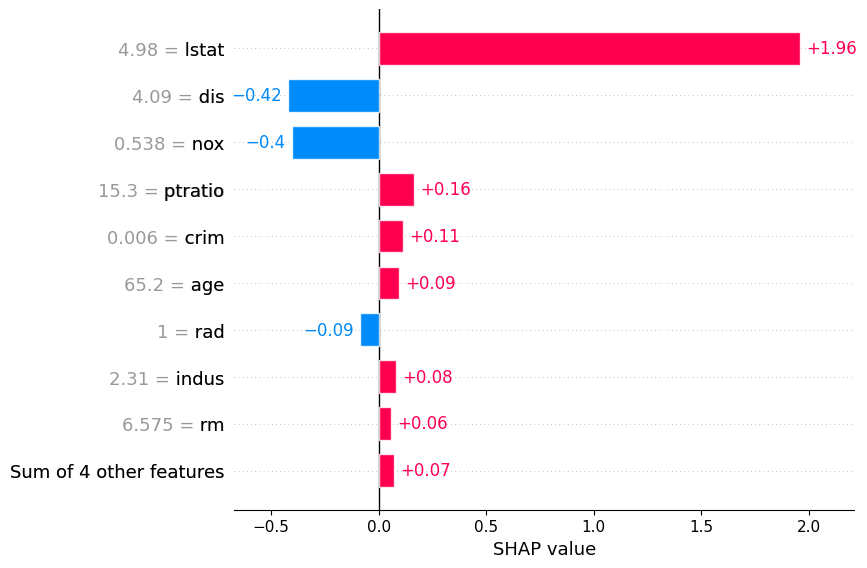

22.412498087322835


In [5]:
# compute SHAP values
explainer_ = shap.Explainer(model, X)
shap_values_ = explainer_(X)
shap.plots.bar(shap_values_[i])
print(shap_values_[i].base_values)

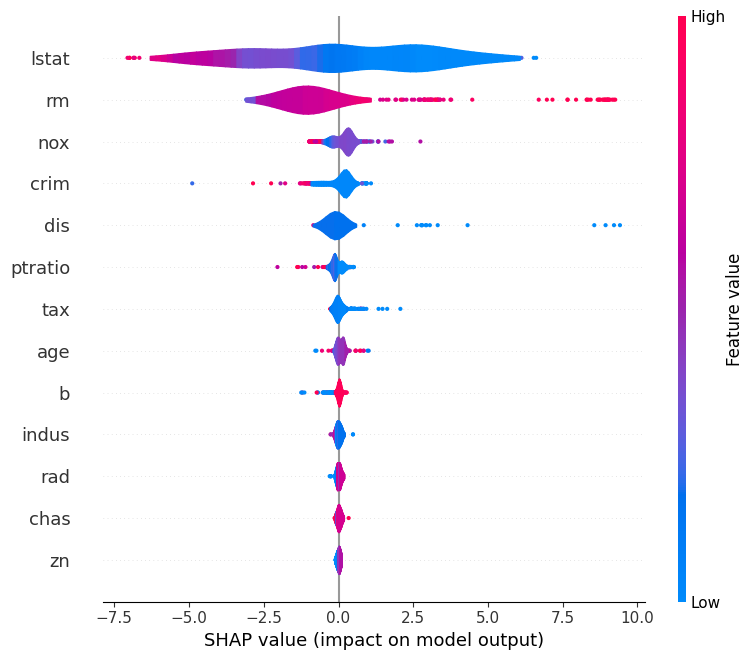

In [7]:
shap.summary_plot(shap_values, X, plot_type="violin")

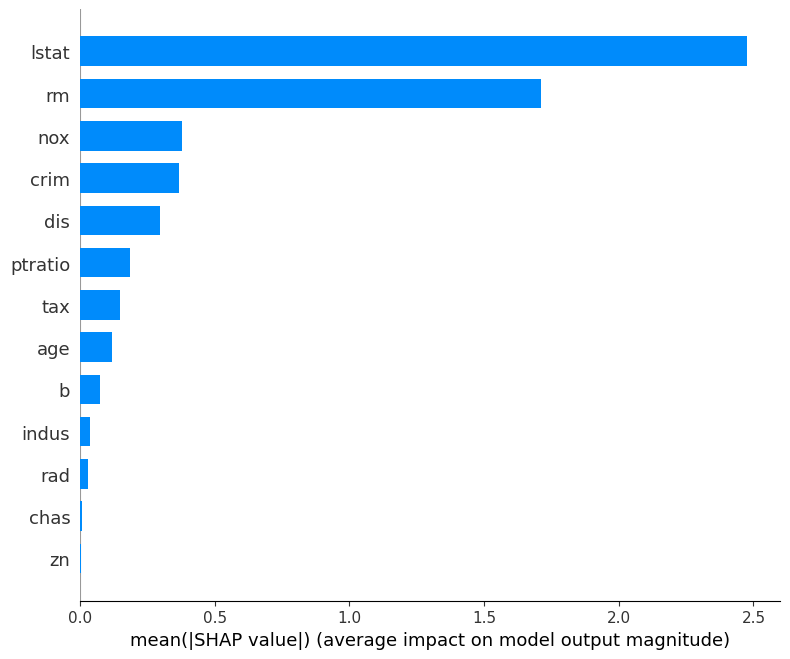

In [8]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [9]:
shap.force_plot(explainer.expected_value, shap_values, X)

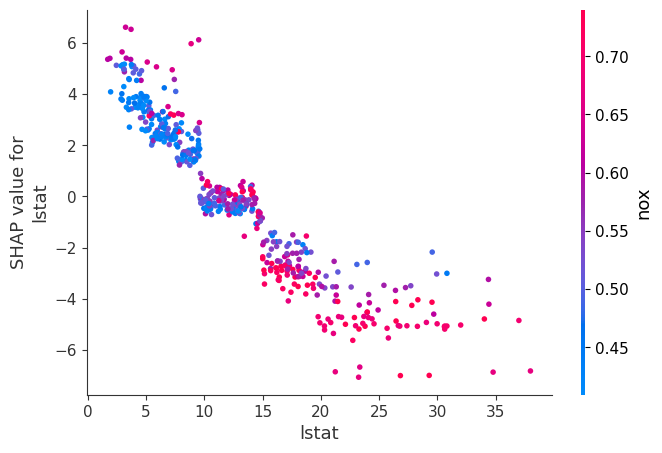

In [10]:
# specify by the index of the features
shap.dependence_plot(ind=12, shap_values=shap_values, features=X)

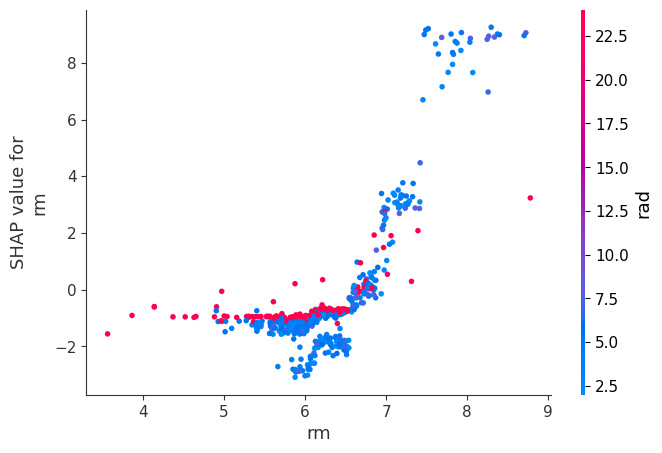

In [11]:
# specify by the feature name
shap.dependence_plot(ind="rm", shap_values=shap_values, features=X)